## **빅데이터 입문 Term project**
### **주제**: CO2를 통한 미래 계절 길이 예측과 탄소중립의 실효성 파악

### **프로젝트 목적**
- 계절 길이를 통한 지구 온난화 심각성 홍보 및 경각심 고취
- 탄소중립 시나리오를 통한 탄소중립 정책의 실효성 파악

### **Target Question**
- 탄소중립 시나리오에 따라 미래 계절 길이는 어떻게 변화하는가?
- 탄소중립 정책은 효과적이고, 성공 시 계절 길이는 어떻게 되는가?

---
## 1. 사계절 길이 데이터 추출

#### 1-1. 라이브러리 호출

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#### 1-2. 대한민국 일평균 기온 데이터 호출 및 시각화

In [11]:
celsius = pd.read_csv('./DB/temperature_1954_2023.csv')
celsius = celsius[celsius['date'] >= '1959-01-01'].reset_index()
celsius.drop('index', axis=1, inplace=True)
celsius

,date,spot,avg,low,high
0,1959-01-01,108,-2.3,-5.5,-0.1
1,1959-01-02,108,-4.6,-8.9,-0.4
2,1959-01-03,108,-5.3,-9.4,-0.8
3,1959-01-04,108,-14.3,-17.4,-9.4
4,1959-01-05,108,-16.4,-19.8,-13.1
...,...,...,...,...,...
23736,2023-12-27,108,1.5,-2.8,6.8
23737,2023-12-28,108,1.2,-1.7,4.4
23738,2023-12-29,108,1.3,-1.5,4.6
23739,2023-12-30,108,0.6,-0.9,2.1


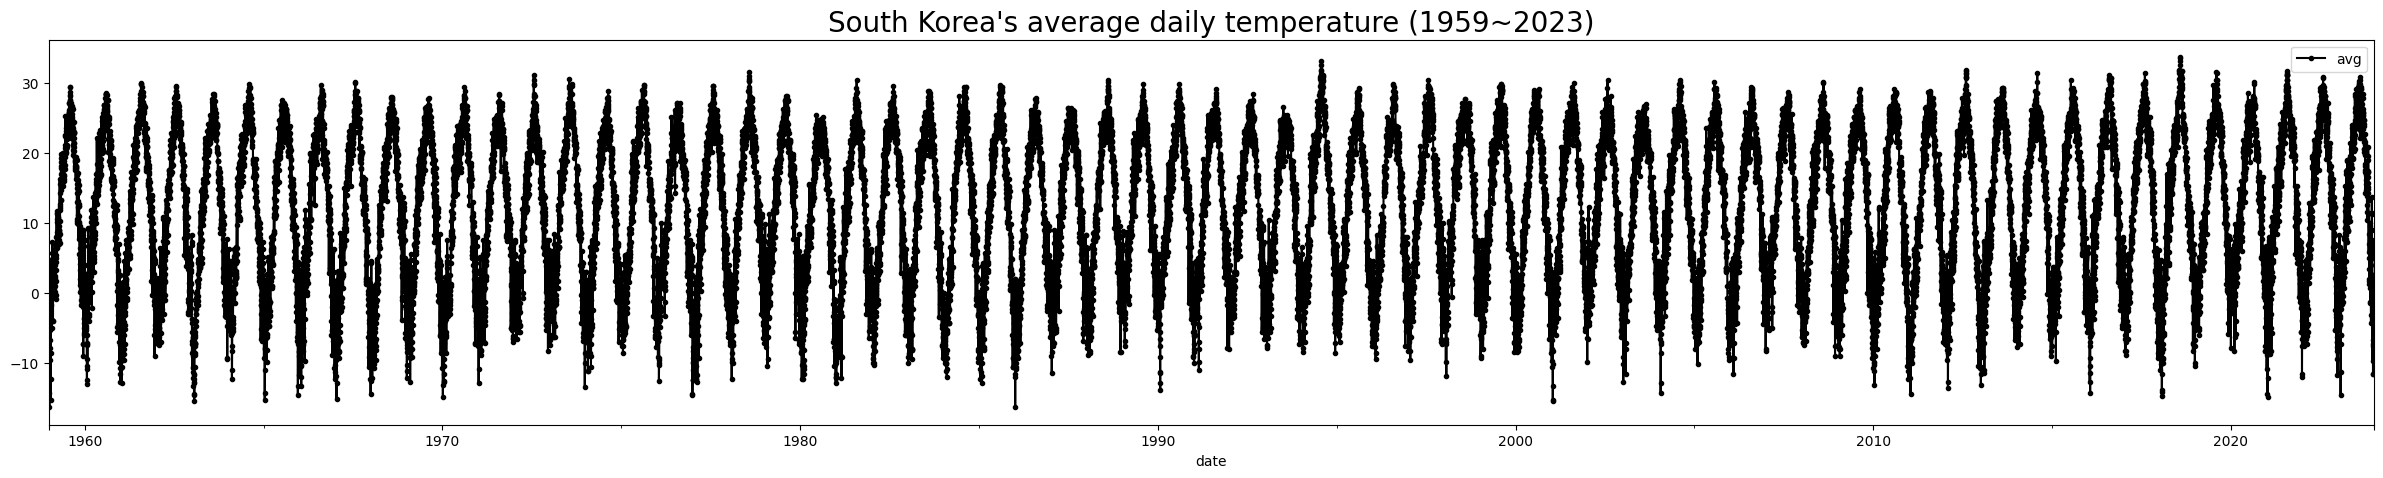

In [12]:
celsius['date'] = pd.to_datetime(celsius['date'], format='%Y-%m-%d')
celsius['year'] = celsius['date'].dt.year

celsius.plot(x='date', y='avg', figsize=(30,5), color='black', marker='.')
plt.title("South Korea's average daily temperature (1959~2023)", fontsize=20)
plt.show()

#### 1-3. 사계절 시작 표기

In [13]:
def calculate_summer_length(start, end):
    start_date = datetime.strptime(start, "%Y-%m-%d %H:%M:%S")
    end_date = datetime.strptime(end, "%Y-%m-%d %H:%M:%S")
    return (end_date - start_date).days

In [14]:
celsius['date'] = pd.to_datetime(celsius['date'], format='%Y-%m-%d')
celsius['year'] = celsius['date'].dt.year

In [15]:
celsius['MA'] = celsius['avg'].rolling(window=9, center=True, min_periods=1).mean()

year_list = []
spring_length = []
for idx in range(len(celsius)-1):
    # 연도별 계산
    if celsius.loc[idx, 'year'] not in year_list:
        # 만약 이동 평균 온도가 이틀 연속 5도 이상이면 (2월 이상)
        if celsius.loc[idx, 'MA'] >= 5 and celsius.loc[idx+1, 'MA'] >= 5 and celsius['date'].dt.month.loc[idx] > 1:
            # spring 시작
            st_spring = celsius.loc[idx+1, 'date']
            celsius.loc[idx+1, 'season'] = 'spring'

            # 봄 시작일 이후부터...
            for j in range(idx+1, len(celsius)-1):
                # 6,7,8월을 여름 시작이라고 하면
                if int(celsius['date'].dt.month.loc[j]) > 5:
                    # 만약 이동 평균 온도가 20도 이상이고, 다음날도 마찬가지라면
                    if celsius.loc[j, 'MA'] >= 20 and celsius.loc[j+1, 'MA'] >= 20:

                        # 여름 시작
                        ed_spring = celsius.loc[j+1, 'date']
                        celsius.loc[j+1, 'season'] = 'summer'
                        
                        # 해당 연도와 여름의 길이를 저장
                        year_list.append(celsius.loc[idx, 'year'])
                        spring_length.append(calculate_summer_length(str(st_spring), str(ed_spring)))
                        break

In [16]:
year_list = []
fall_length = []
for idx in range(len(celsius)-1):
    # 연도별 계산
    if celsius.loc[idx, 'year'] not in year_list:
        # 만약 이동 평균 온도가 이틀 연속 20도 미만이면(9월 이상)
        if celsius.loc[idx, 'MA'] < 20 and celsius.loc[idx+1, 'MA'] < 20 and celsius['date'].dt.month.loc[idx] > 8:
            # fall 시작
            st_fall = celsius.loc[idx+1, 'date']
            celsius.loc[idx+1, 'season'] = 'fall'

            # 가을 시작일 이후부터...
            for j in range(idx+1, len(celsius)-1):
                # 12, 1, 2월을 겨울이라고 하면
                if int(celsius['date'].dt.month.loc[j]) > 9:
                    # 만약 이동 평균 온도가 5도 미만이고, 다음날도 마찬가지라면
                    if celsius.loc[j, 'MA'] < 5 and celsius.loc[j+1, 'MA'] < 5:
                        # 겨울 시작
                        ed_fall = celsius.loc[j+1, 'date']
                        celsius.loc[j+1, 'season'] = 'winter'
                        
                        # 해당 연도와 여름의 길이를 저장
                        year_list.append(celsius.loc[idx, 'year'])
                        fall_length.append(calculate_summer_length(str(st_fall), str(ed_fall)))
                        break

In [17]:
celsius.to_csv('./DB/season_2.csv')